In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import nbimporter
from preprocessamento import *

Importing Jupyter notebook from preprocessamento.ipynb


In [2]:
data_2016 = pd.read_csv('respostas_2016.csv')

In [3]:
dados_2016 = preprocessar(data_2016)

In [4]:
dados_2016.shape

(237, 29)

In [5]:
target = gerar_target(data_2016)

In [6]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [9]:
clf.fit(dados_2016, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [11]:
importances = clf.feature_importances_

In [12]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)

In [13]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 14 (0.056529)
2. feature 23 (0.054098)
3. feature 26 (0.053582)
4. feature 18 (0.051392)
5. feature 16 (0.048026)
6. feature 17 (0.045907)
7. feature 11 (0.045763)
8. feature 15 (0.045723)
9. feature 2 (0.044643)
10. feature 3 (0.044332)
11. feature 27 (0.044127)
12. feature 20 (0.044001)
13. feature 22 (0.042361)
14. feature 28 (0.041873)
15. feature 10 (0.041467)
16. feature 6 (0.040621)
17. feature 24 (0.039418)
18. feature 25 (0.039166)
19. feature 9 (0.038001)
20. feature 21 (0.037394)
21. feature 19 (0.033636)
22. feature 0 (0.026693)
23. feature 7 (0.012778)
24. feature 12 (0.011920)
25. feature 4 (0.007030)
26. feature 8 (0.005809)
27. feature 1 (0.002152)
28. feature 5 (0.001559)
29. feature 13 (0.000000)


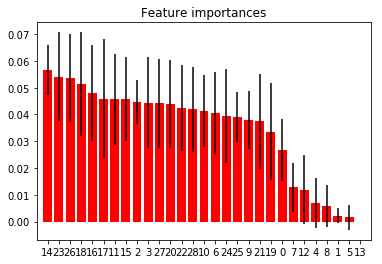

In [14]:
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(dados_2016.shape[1]), indices)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()
